# Iris 데이터셋 분석

Iris 데이터셋은 영국 통계학자 Ronald A. Fisher가 1936년에 발표한 논문에서 처음 사용한, 전 세계적으로 가장 유명한 기초 데이터셋이다.
3종의 붓꽃(Iris setosa, Iris versicolor, Iris virginica)에 대해
꽃받침(sepal)과 꽃잎(petal)의 길이와 너비를 측정한 값으로 구성되어 있다.

- 품종 분류(classification) 연구의 대표적인 예시 데이터
  - 붓꽃 품종별 특징 비교
  - petal_length / sepal_length 등 길이·너비의 분포 차이
  - 품종 간 구별되는 패턴 파악
  - 상관관계 및 다변량 관계 분석 등

- `iris.csv` 파일에 저장
 
 | 컬럼명 | 설명 |
| --- | --- |
| `sepal_length` | 꽃받침(sepal)의 길이(cm) |
| `sepal_width` | 꽃받침의 너비(cm) |
| `petal_length` | 꽃잎(petal)의 길이(cm) |
| `petal_width` | 꽃잎의 너비(cm) |
| `species` | 붓꽃의 종(예: Iris-setosa, Iris-versicolor, Iris-virginica) |




### 1. 환경 설정 및 데이터 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('seaborn-v0_8-darkgrid')

df = pd.read_csv('../data/iris.csv')

## 2. 데이터의 기본 구조 및 결측치 확인

In [ ]:
# 2.2 데이터 shape, head, info 확인
print(f"데이터셋 형태: {df.shape}")
print("\n데이터셋 상위 5개 행:")
print(df.head())
print("\n데이터셋 정보:")
df.info()

데이터셋 형태: (150, 5)

데이터셋 상위 5개 행:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

데이터셋 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


- 총 150개의 데이터가 있으며, 결측치가 없다.
- 타겟변수 species만 범주형이고 나머지 변수는 다 실수형(float)이다.

In [3]:
# 2.2 타겟변수 확인
print("\n품종별 데이터 개수:")
print(df['species'].value_counts())


품종별 데이터 개수:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


- 세가지 품종이 모두 50개씩, 클래스가 균형.

### 3. 기술 통계 분석 및 변수 분포

In [4]:
# 3.1 기술 통계 요약
print("\n수치형 변수 기술 통계:")
print(df.describe().T)


수치형 변수 기술 통계:
              count      mean       std  min  25%   50%  75%  max
sepal_length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal_width   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal_length  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal_width   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5


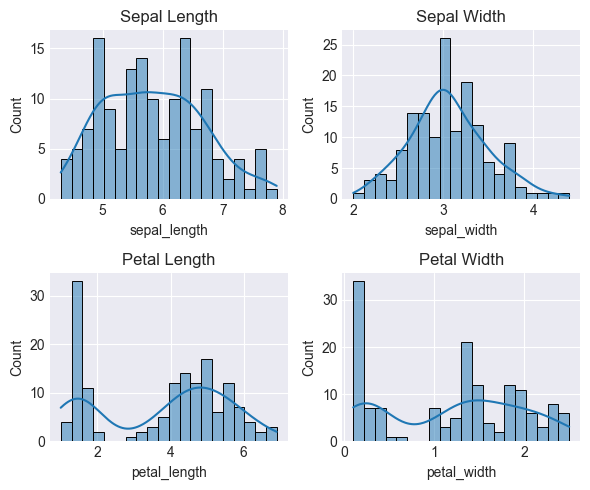

In [7]:
# 3.2 모든 수치형 변수 분포 확인
plt.figure(figsize=(6, 5))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'{col.replace("_", " ").title()}')

plt.tight_layout()
plt.show()

- 비교적 정규분포.
- petal_length랑 petal_width는 여러 봉우리를 갖는것처럼 보임.
    - 세가지 품종이 있어서..?

### 4. 품종별 이변량 및 다변량 분석

C:\Users\USER\AppData\Local\Temp\ipykernel_14264\1835596383.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species', y=col, data=df, palette='muted')
C:\Users\USER\AppData\Local\Temp\ipykernel_14264\1835596383.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species', y=col, data=df, palette='muted')
C:\Users\USER\AppData\Local\Temp\ipykernel_14264\1835596383.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species', y=col, data=df, palette='muted')
C:\Users\USER\AppData\Local\Temp\ipykernel_14264\1835596383.py:5

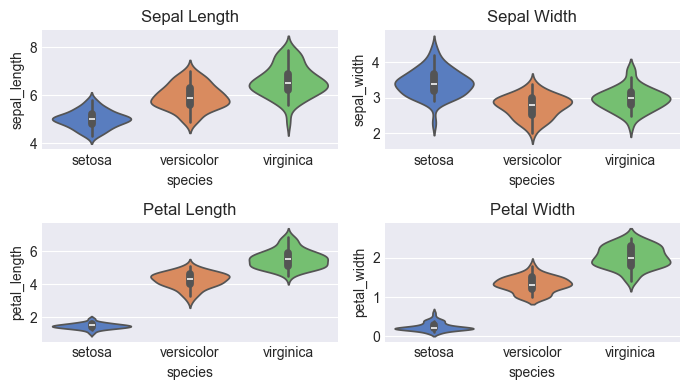

In [9]:
# 4.1 품종별 측정값 분포 (Violin Plot)
plt.figure(figsize=(7, 4))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x='species', y=col, data=df, palette='muted')
    plt.title(f'{col.replace("_", " ").title()}')

plt.tight_layout()
plt.show()

- petal_length랑 petal_width : setosa 품종과 나머지 두 모델과는 완벽하게 구분이 가능하다.
- sepal_length랑 sepal_width : 상당히 많이 겹쳐서 구별하기 어렵다.

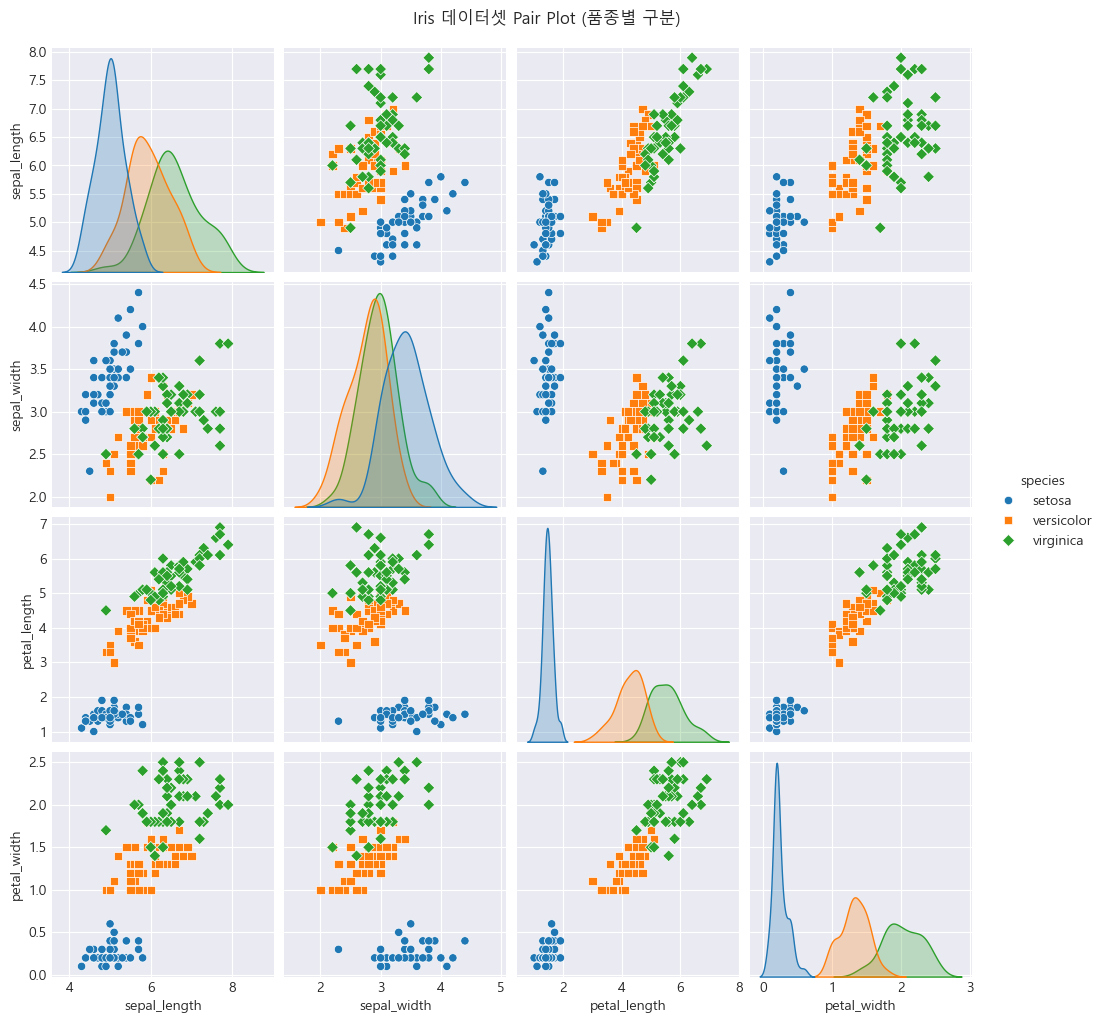

In [ ]:
# 4.2 페어 플롯을 통한 다변량 관계 분석
# 다변량 관계 분석을 위한 Pair Plot
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.suptitle('Iris 데이터셋 Pair Plot (품종별 구분)', y=1.02)
plt.show()

이거는 그냥 해본거라. 잘 모름요/.. 하핫

### 5. 상관 관계 분석

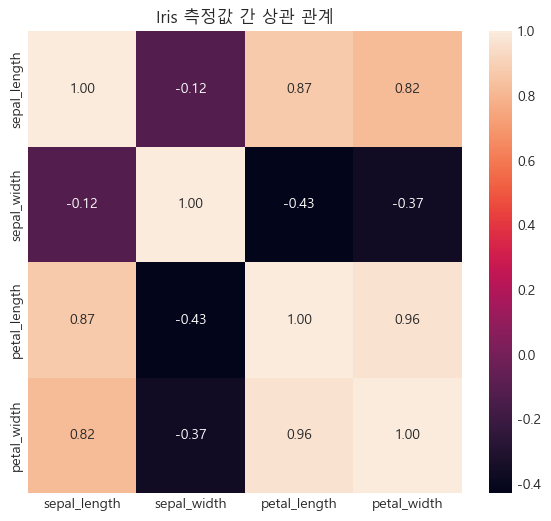

In [13]:
# 수치형 변수만 선택 및 상관 계수 계산
corr_matrix = df.drop('species', axis=1).corr()

plt.figure(figsize=(7, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Iris 측정값 간 상관 관계')
plt.show()

- 주요 상관 관계:
    - 매우 높은 양의 상관 관계: petal_length와 petal_width는 매우 강한 양의 선형 관계(0.96)를 보입니다. 즉, 꽃잎이 길면 너비도 넓을 확률이 높습니다.
    - 높은 양의 상관 관계: sepal_length는 petal_length 및 petal_width 강한 관계(0.87, 0.82)를 가집니다.

# EDA 정리 및 Insight

- 구별 가능한 특성: **꽃잎의 길이(petal_length)와 너비(petal_width)**
    - 이 두 변수만으로도 Setosa는 완벽하게, Versicolor와 Virginica는 높은 정확도로 분리 가능.

- 분리 난이도:
    - setosa: 모든 다른 품종과 측정값이 완전히 분리 가능
    - versicolor & virginica: 이 두 품종은 꽃받침 측정값(sepal_length/sepal_width)에서 크게 겹치지만, 꽃잎 측정값에서는 분리 가능성이 높습니다.

- 데이터의 완벽한 균형: 
    - 타겟 변수 species는 완벽하게 균형 잡힌 50:50:50 비율을 가지므로, 모델 학습 시 편향 문제를 걱정x